In [1]:
import pytorch_transformers as pt

import lm_diag as ld

Load a BERT model.

In [2]:
model_type = 'bert-large-uncased'
model = pt.BertForMaskedLM.from_pretrained(model_type)
tokenizer = pt.BertTokenizer.from_pretrained(model_type)

This is the evaluation function - you need to initialize it with a BERT model and tokenizer.

In [3]:
evaluate = ld.EvaluateBert(model, tokenizer)

## Basic Input and Output

What does BERT think about itself?

In [18]:
target_prob, target_order, probs, orders = evaluate(
    sentence='This language model is very strong.', 
    target_word='strong',
    display=False)

These are the outputs:

In [19]:
target_prob

0.0135872755

In [20]:
target_order

9

In [21]:
probs.shape

(30522,)

In [22]:
orders.shape

(30522,)

The probs and orders cover the entire vocabulary. The orders are an ordered list of token indices, from highest to lowest prediction probability. The probs are **ordered**.

## Visualization

You can print top-k predictions:

In [23]:
evaluate.print_top(k=5, ordered_token_ixs=orders, ordered_probs=probs)

Top 5 predictions
	Rank	Token		Prob
	----	-----		----
	1	simple		0.141
	2	flexible	0.112
	3	complex		0.080
	4	efficient	0.043
	5	useful		0.035


And also the non-zero part of the Zipfian output distribution (rounded to 3 decimal places):

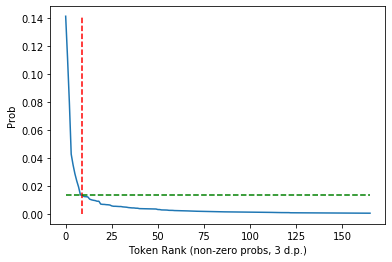

In [24]:
evaluate.plot_non_zero(probs, target_order, target_prob)

You can do all this displaying when called by leaving `display` to its default of `True`.

--------
"The most promising philosophical basis for future progress in artificial intelligence is nativism."
Predicting "promising" @ rank 23 / 30522 (top 0.08%) with probability 0.002


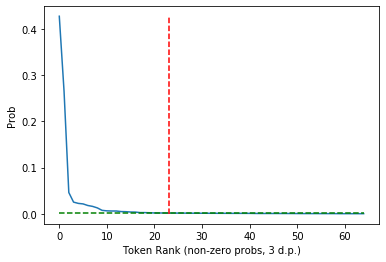

Top 10 predictions
	Rank	Token		Prob
	----	-----		----
	1	important	0.427
	2	common		0.265
	3	prominent	0.046
	4	basic		0.025
	5	fundamental	0.023
	6	likely		0.022
	7	influential	0.018
	8	popular		0.016
	9	significant	0.013
	10	accepted	0.008


In [25]:
target_prob, target_order, probs, orders = evaluate(
    sentence='The most promising philosophical basis for future progress in artificial intelligence is nativism.', 
    target_word='promising',
    k_to_show=10)

## Debugging

To get some debug info about how your input has been processed, pass `debug=True` to the evaluation function.

Target "science" @ index 18
0	[CLS]
1	strong
2	em
3	##pi
4	##ric
5	##ism
6	is
7	hardly
8	just
9	##if
10	##iable
11	in
12	light
13	of
14	the
15	evidence
16	of
17	cognitive
18	[MASK]
19	.
20	[SEP]
--------
"Strong empiricism is hardly justifiable in light of the evidence of cognitive science."
Predicting "science" @ rank 9 / 30522 (top 0.03%) with probability 0.020


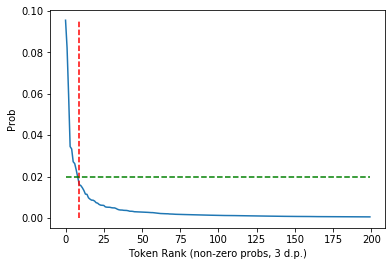

Top 10 predictions
	Rank	Token		Prob
	----	-----		----
	1	bias		0.096
	2	impairment	0.082
	3	disability	0.060
	4	ability		0.034
	5	psychology	0.033
	6	disabilities	0.027
	7	neuroscience	0.026
	8	limitations	0.023
	9	science		0.020
	10	disorders	0.016


In [26]:
target_prob, target_order, probs, orders = evaluate(
    sentence='Strong empiricism is hardly justifiable in light of the evidence of cognitive science.', 
    target_word='science',
    debug=True)

## Issues

The function currently cannot handle words cut into pieces. It will fail gracefully (sort of) and tell you about this.

In [27]:
_ = evaluate(
    sentence='We are of a strong mind to favour empiricism.', 
    target_word='empricism')

['we', 'are', 'of', 'a', 'strong', 'mind', 'to', 'favour', 'em', '##pi', '##ric', '##ism', '.']
Is your target word in pieces? If so pick another.
empricism


Exception: 